### PostgreSQL Exploration - connecting to a database

In [5]:
import psycopg2 as pg

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 14



In [7]:
# Set up database connection

conn = pg.connect(
    host = 'dbp3.ctzq8zyqdbik.us-east-1.rds.amazonaws.com',
    database = 'postgres',
    user = 'dfmaster',
    password = 'password'
)

In [8]:
cur = conn.cursor()


In [17]:
cur.close()

In [24]:
def postgresql_to_dataframe(conn, sql_query, column_names):
    """
    Transform PostgreSQL table to Pandas dataframe
    """
    # Create cursor
    cursor = conn.cursor()
    
    # Execute Query
    try:
        cursor.execute(sql_query)
    except (Exception, pg.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Save results
    results = cursor.fetchall()
    
    # Save to dataframe
    
    df = pd.DataFrame(results, columns=column_names)
    return df

In [25]:


column_names = ['item_id', 'name', 'description', 'weight_oz', 'dimensions_in', 'num_stocked', 
                'num_orderd', 'time_to_solve_mins', 'type', 'retail_price', 'vendor_id', 'cost_per_unit']

df = postgresql_to_dataframe(conn, 'select * from inventory', column_names)

In [26]:
df.head()

,item_id,name,description,weight_oz,dimensions_in,num_stocked,num_orderd,time_to_solve_mins,type,retail_price,vendor_id,cost_per_unit
0,1,enigma,tricky puzzle,0.00,,50,0,2.5,test,5.50,0,3.67
1,2,test,test,0.00,None,0,0,0.0,None,None,0,None
2,22,Scannable Clue Set,Treasure-hunt sequence of 5-10 QR code clues. ...,13.10,6.5 x 8.5 x 0.75,61,20,15.0,Digital Puzzles,25.99,4,17.33
3,23,RFID Door Lock,Deadbolt lock system for door. Includes 400 u...,77.44,7.1 x 11.7 x 6.9,33,50,1.0,Props,259.99,1,173.33
4,24,Wireless Number Pad,Wireless 10-digit number pad with programmable...,4.66,3.5 x 5 x 1.2,92,100,1.0,Props,39.99,4,26.66


In [36]:
df.type.groupby(df.type).head()

0                 test
1                 None
2      Digital Puzzles
3                Props
4                Props
5       Number Puzzles
6       Number Puzzles
7      Decoder Puzzles
8         Word Puzzles
9      Digital Puzzles
10               Props
11               Props
12       Logic Puzzles
13     Digital Puzzles
14               Props
24        Word Puzzles
25    Physical Puzzles
26       Logic Puzzles
27        Logic Puzzle
28        Logic Puzzle
Name: type, dtype: object

In [37]:
df.head()

,item_id,name,description,weight_oz,dimensions_in,num_stocked,num_orderd,time_to_solve_mins,type,retail_price,vendor_id,cost_per_unit
0,1,enigma,tricky puzzle,0.00,,50,0,2.5,test,5.50,0,3.67
1,2,test,test,0.00,None,0,0,0.0,None,None,0,None
2,22,Scannable Clue Set,Treasure-hunt sequence of 5-10 QR code clues. ...,13.10,6.5 x 8.5 x 0.75,61,20,15.0,Digital Puzzles,25.99,4,17.33
3,23,RFID Door Lock,Deadbolt lock system for door. Includes 400 u...,77.44,7.1 x 11.7 x 6.9,33,50,1.0,Props,259.99,1,173.33
4,24,Wireless Number Pad,Wireless 10-digit number pad with programmable...,4.66,3.5 x 5 x 1.2,92,100,1.0,Props,39.99,4,26.66


In [86]:
# make 'none' columns null
df.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [ ]:
# columns that are numeric only for heatmapping
num_columns = ['weight_oz', 'num_stocked', 'num_ordered', 'time_to_solve_mins', 'retail_price']

In [38]:
df.type()

TypeError: 'Series' object is not callable

In [39]:
df.type.head()

0               test
1               None
2    Digital Puzzles
3              Props
4              Props
Name: type, dtype: object

In [41]:
df.columns

Index(['item_id', 'name', 'description', 'weight_oz', 'dimensions_in',
       'num_stocked', 'num_orderd', 'time_to_solve_mins', 'type',
       'retail_price', 'vendor_id', 'cost_per_unit'],
      dtype='object')

In [42]:
df.groupby(by='type')

In [45]:
df.groupby(by='type').count()

,item_id,name,description,weight_oz,dimensions_in,num_stocked,num_orderd,time_to_solve_mins,retail_price,vendor_id,cost_per_unit
type,,,,,,,,,,,
Decoder Puzzles,1,1,1,1,1,1,1,1,1,1,1
Digital Puzzles,3,3,3,3,3,3,3,3,3,3,3
Logic Puzzle,2,2,2,2,2,2,2,2,0,2,0
Logic Puzzles,2,2,2,2,2,2,2,2,2,2,2
Number Puzzles,2,2,2,2,2,2,2,2,2,2,2
Physical Puzzles,1,1,1,1,1,1,1,1,1,1,1
Props,14,14,14,14,14,14,14,14,14,14,14
Word Puzzles,2,2,2,2,2,2,2,2,2,2,2
test,1,1,1,1,1,1,1,1,1,1,1


In [46]:
df.type.count()

28

In [55]:
df.groupby(by='type').type.count()

type
Decoder Puzzles      1
Digital Puzzles      3
Logic Puzzle         2
Logic Puzzles        2
Number Puzzles       2
Physical Puzzles     1
Props               14
Word Puzzles         2
test                 1
Name: type, dtype: int64

In [74]:
df.groupby(by='type').type

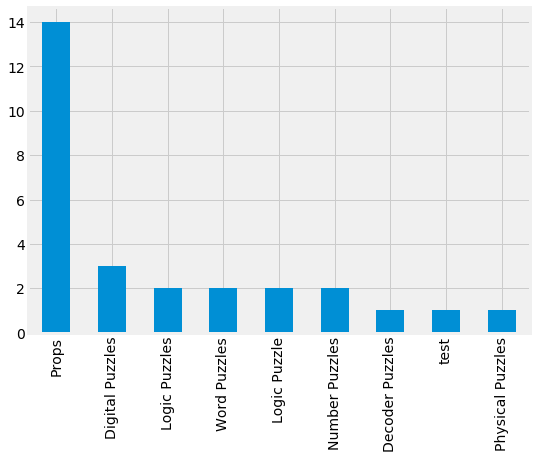

In [77]:
df.type.value_counts().plot(kind='bar')

In [81]:
def scatter_plot(df, x_var, y_var):
    ax = df.plot(kind='scatter',
                x=x_var,
                y=y_var,
                figsize=(12, 12),
                color = 'g')
    ax.set(xlabel=x_var.title(), ylabel=y_var.title())
    return ax

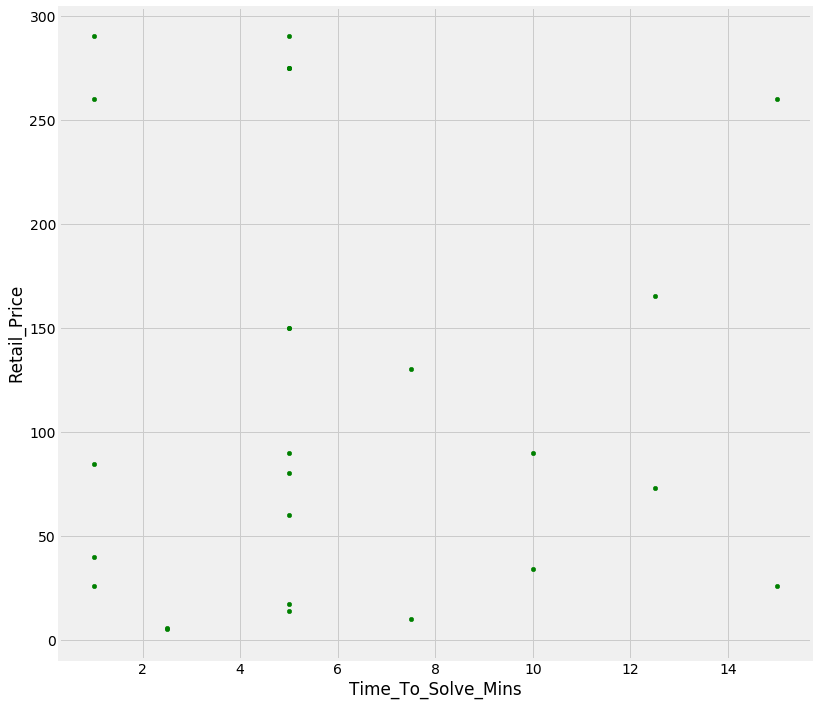

In [84]:
scatter_plot(df, 'time_to_solve_mins','retail_price')

In [85]:
sns.heatmap(df)

TypeError: '<=' not supported between instances of 'int' and 'str'